## Testing Top2Vec

Applying Top2Vex to a corpus of brazilian public contracts descriptions.


References from [Dimo Angelov](https://github.com/ddangelov/Top2Vec) and the [tool docs](https://top2vec.readthedocs.io/en/latest/api.html).

In [21]:
import pandas as pd
from top2vec import Top2Vec
from datetime import datetime

In [10]:
path_home = "/home/dell/workspace/top2vec/data/"
contratos_file = "Contratos_PB_2010_2018.csv"

contratos  = pd.read_csv(path_home+contratos_file, low_memory=False)

In [11]:
contratos.columns

Index(['cd_u_gestora', 'dt_ano', 'nu_contrato', 'dt_assinatura', 'pr_vigencia',
       'nu_cpfcnpj', 'nu_licitacao', 'tp_licitacao', 'vl_total_contrato',
       'de_obs', 'dt_mes_ano', 'De_Modalidade', 'de_Ugestora', 'no_Municipio'],
      dtype='object')

In [16]:
contratos.de_obs = contratos.de_obs.astype(str)
contratos['de_obs'] = contratos['de_obs'].map(lambda x: x.lower())

desc_contratos = contratos['de_obs'].to_list()

In [17]:
desc_contratos[0:10]

['aquisicao parcelada de mochila escolar destinados a distribuicao aos alunos da rede municipal de ensino',
 'aquisicao parcelada de material de expediente diversos destinados ao fundo municipal de saude',
 'locacao de imovel para instalacao de equipamento publico  alto da boa vista i',
 'contratacao de escritorio de advocacia para execucao dos servicos tecnicos de assessoria e consultoria juridica no ambi',
 'aquisição de materiais de cozinha e vestuário diversos destinados às secretarias de educação e e ação social',
 'aquisição de motocicletas 0km destinados ao departamento municipal de trânsito',
 'aquisição de equipamento odontológico e material permanente destinado a secretaria de saúde',
 'aquisicao parcelada de eletrodomesticos e equipamentos destinado as secretarias do municipio',
 'aquisicao parcelada de material de expediente diversos destinados ao fundo municipal de saude',
 'locacao de imoveis para instalacao de equipamentos publicos destinados ao fundo municipal de saude 

In [51]:
len(desc_contratos)

239891

### Training Model

In [23]:
inicio_treinamento = datetime.now().strftime("%H:%M:%S")
print("INICIO TREINAMENTO =", inicio_treinamento)

model = Top2Vec(desc_contratos, workers=5)

termino_treinamento = datetime.now().strftime("%H:%M:%S")
print("FIM TREINAMENTO =", termino_treinamento)

2022-04-29 17:26:31,559 - top2vec - INFO - Pre-processing documents for training


INICIO TREINAMENTO = 17:26:31


2022-04-29 17:26:46,292 - top2vec - INFO - Creating joint document/word embedding
2022-04-29 18:04:55,049 - top2vec - INFO - Creating lower dimension embedding of documents
2022-04-29 18:27:15,143 - top2vec - INFO - Finding dense areas of documents
2022-04-29 18:27:35,235 - top2vec - INFO - Finding topics


FIM TREINAMENTO = 18:27:51


In [24]:
model.save("Contratos-Top2Vec")
model = Top2Vec.load("Contratos-Top2Vec")

In [25]:
# get the number of topics
model.get_num_topics()

3451

In [26]:
# get topic sizes

# topic_sizes: The number of documents most similar to each topic.
# topic_nums: The unique index of every topic will be returned.

topic_sizes, topic_nums = model.get_topic_sizes()

In [28]:
topic_sizes

array([7490,  842,  798, ...,    2,    1,    1])

In [29]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76])

In [31]:
# get topics

# topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
# word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.
# topic_nums: The unique index of every topic will be returned.

topic_words, word_scores, topic_nums = model.get_topics(1000)


In [32]:
topic_words

array([['plantoe', 'estudantess', 'etudantes', ..., 'qualidade',
        'empreen', 'gases'],
       ['etudantes', 'estudantess', 'apropriados', ..., 'correspondente',
        'rede', 'bonito'],
       ['sondas', 'radiologico', 'cosmeticos', ..., 'psicotropicos',
        'candida', 'vargas'],
       ...,
       ['representante', 'artistica', 'festivo', ..., 'artisticas',
        'exclusivo', 'festejos'],
       ['receitas', 'balancetes', 'contabil', ..., 'licitatorios',
        'anual', 'cirurgi'],
       ['estudantess', 'cirurgi', 'pediatrica', ..., 'licitacoes',
        'defesas', 'adjacencias']], dtype='<U15')

In [48]:
# search topics

# topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
# word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.
# topic_scores: For each topic the cosine similarity to the search keywords will be returned.
# topic_nums: The unique index of every topic will be returned.

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicamentos"], num_topics=2)

In [49]:
topic_words

[array(['antimicrobianos', 'colostomia', 'caps', 'cbaf', 'excepcionais',
        'ministro', 'sondas', 'mental', 'farmaceutica', 'enterais', 'samu',
        'basicas', 'oswaldo', 'neurofuncional', 'hipertensao',
        'medicamentos', 'diabetes', 'bolsas', 'trigueiro', 'citologicos',
        'controlados', 'hospital', 'distrital', 'psicotropicos',
        'hospitalares', 'eticos', 'plantoes', 'farmacia', 'psicossocial',
        'injetaveis', 'unidades', 'basica', 'ad', 'medicos', 'saude',
        'genericos', 'glicemia', 'ubsfs', 'prestara', 'emergenc',
        'aquisicao', 'comprovacao', 'nutricao', 'elenco', 'habitantes',
        'parceladas', 'albuquerque', 'ceo', 'orteses', 'hospitalar'],
       dtype='<U15'),
 array(['farma', 'abc', 'genericos', 'eticos', 'tabela', 'desconto',
        'abcfarma', 'porcentagem', 'maior', 'similares', 'percentual',
        'oferta', 'considerando', 'cosmeticos', 'receita', 'sobre',
        'vigente', 'medicamentos', 'ofertado', 'medicamento', 'orde

In [50]:
topic_nums

array([3447, 1562])

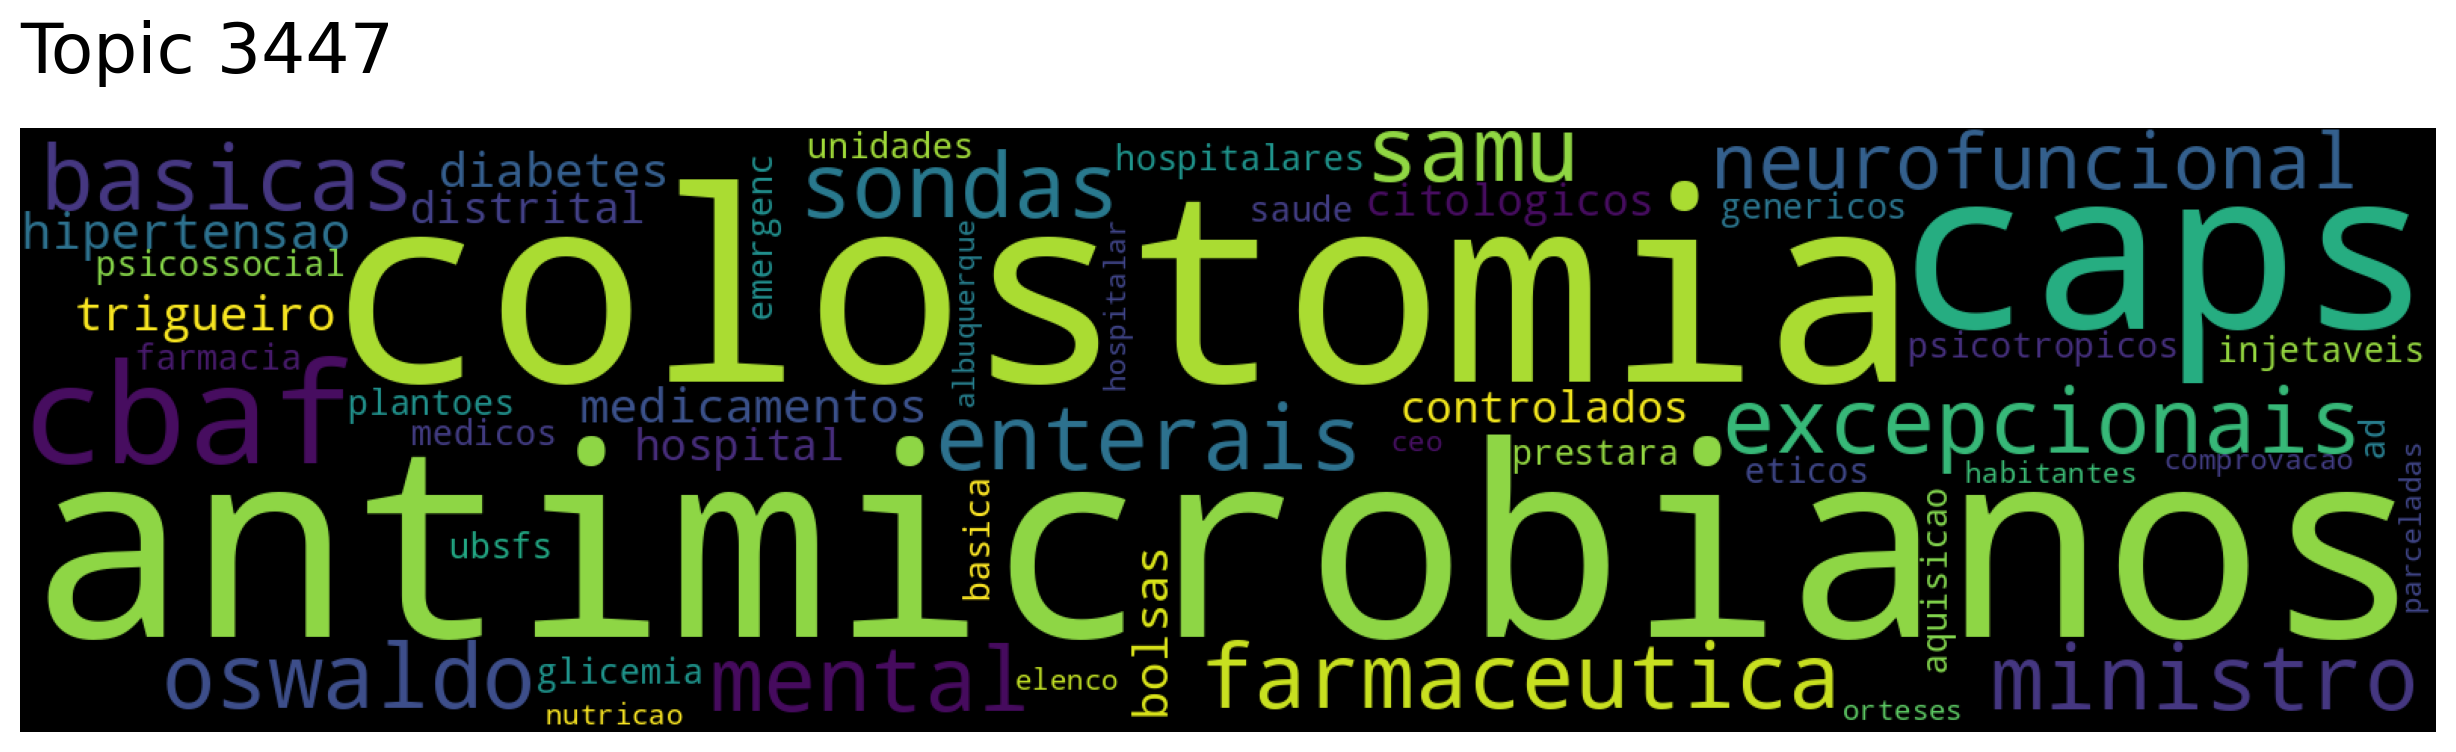

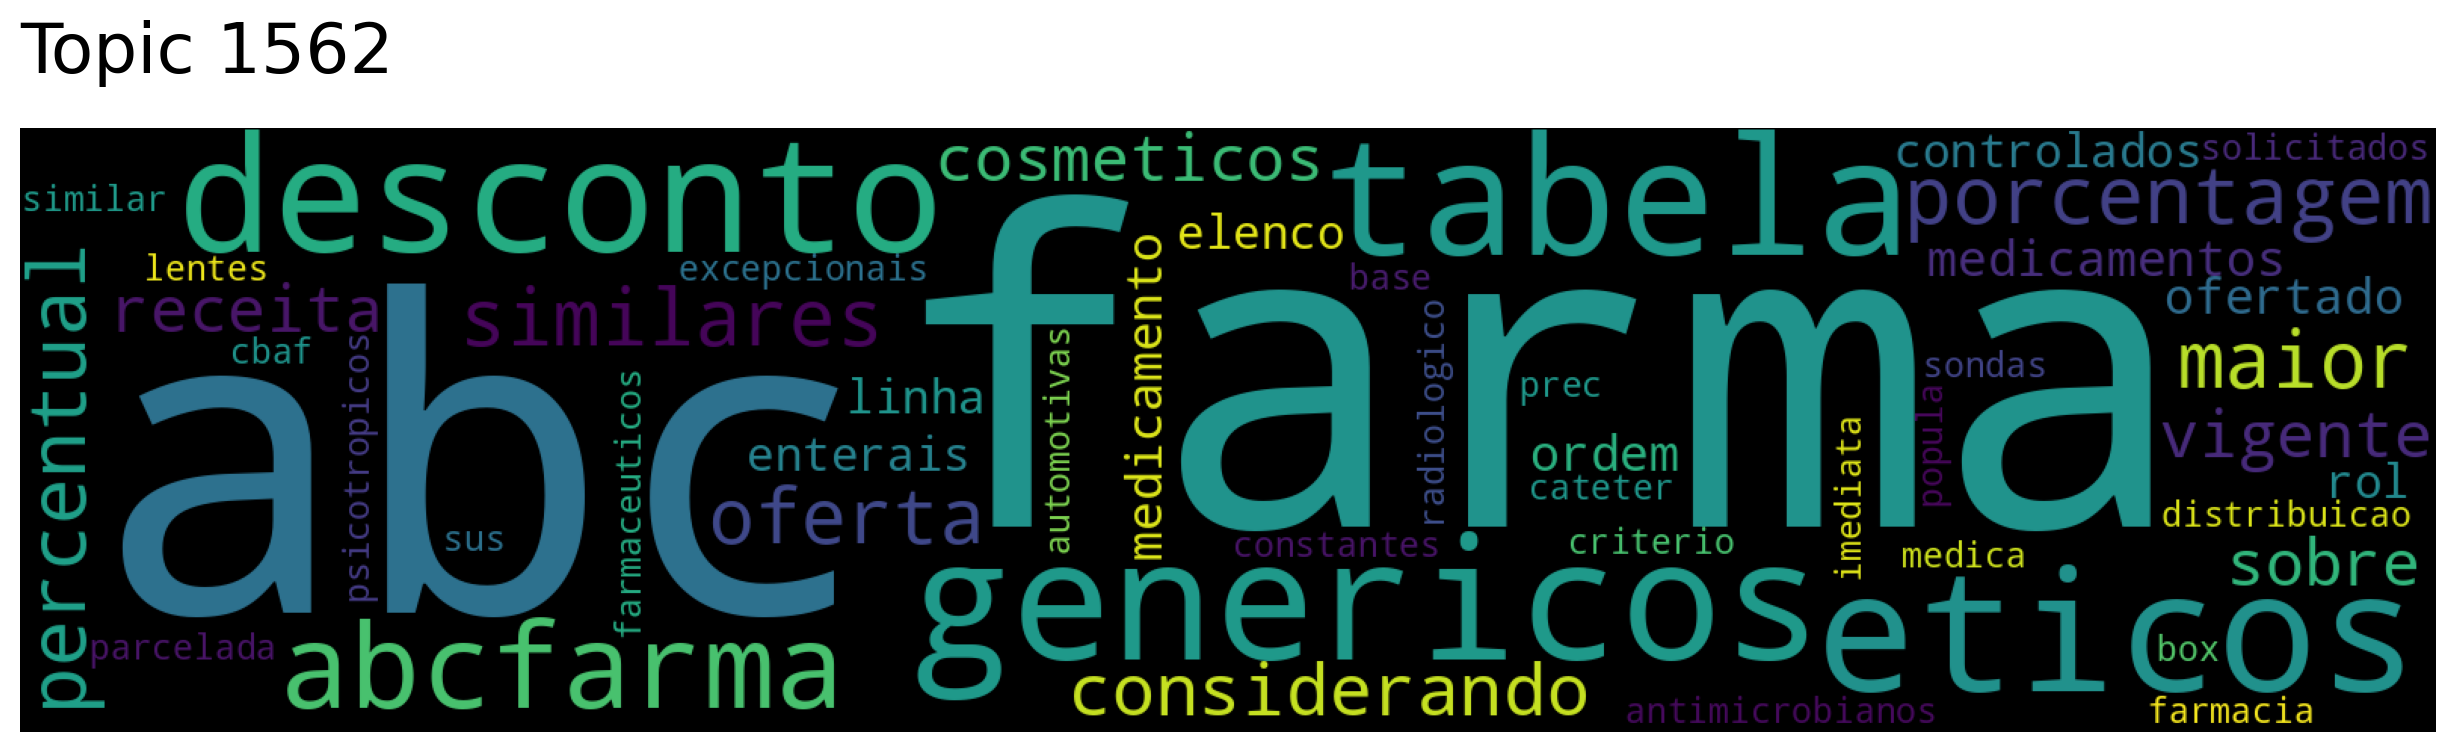

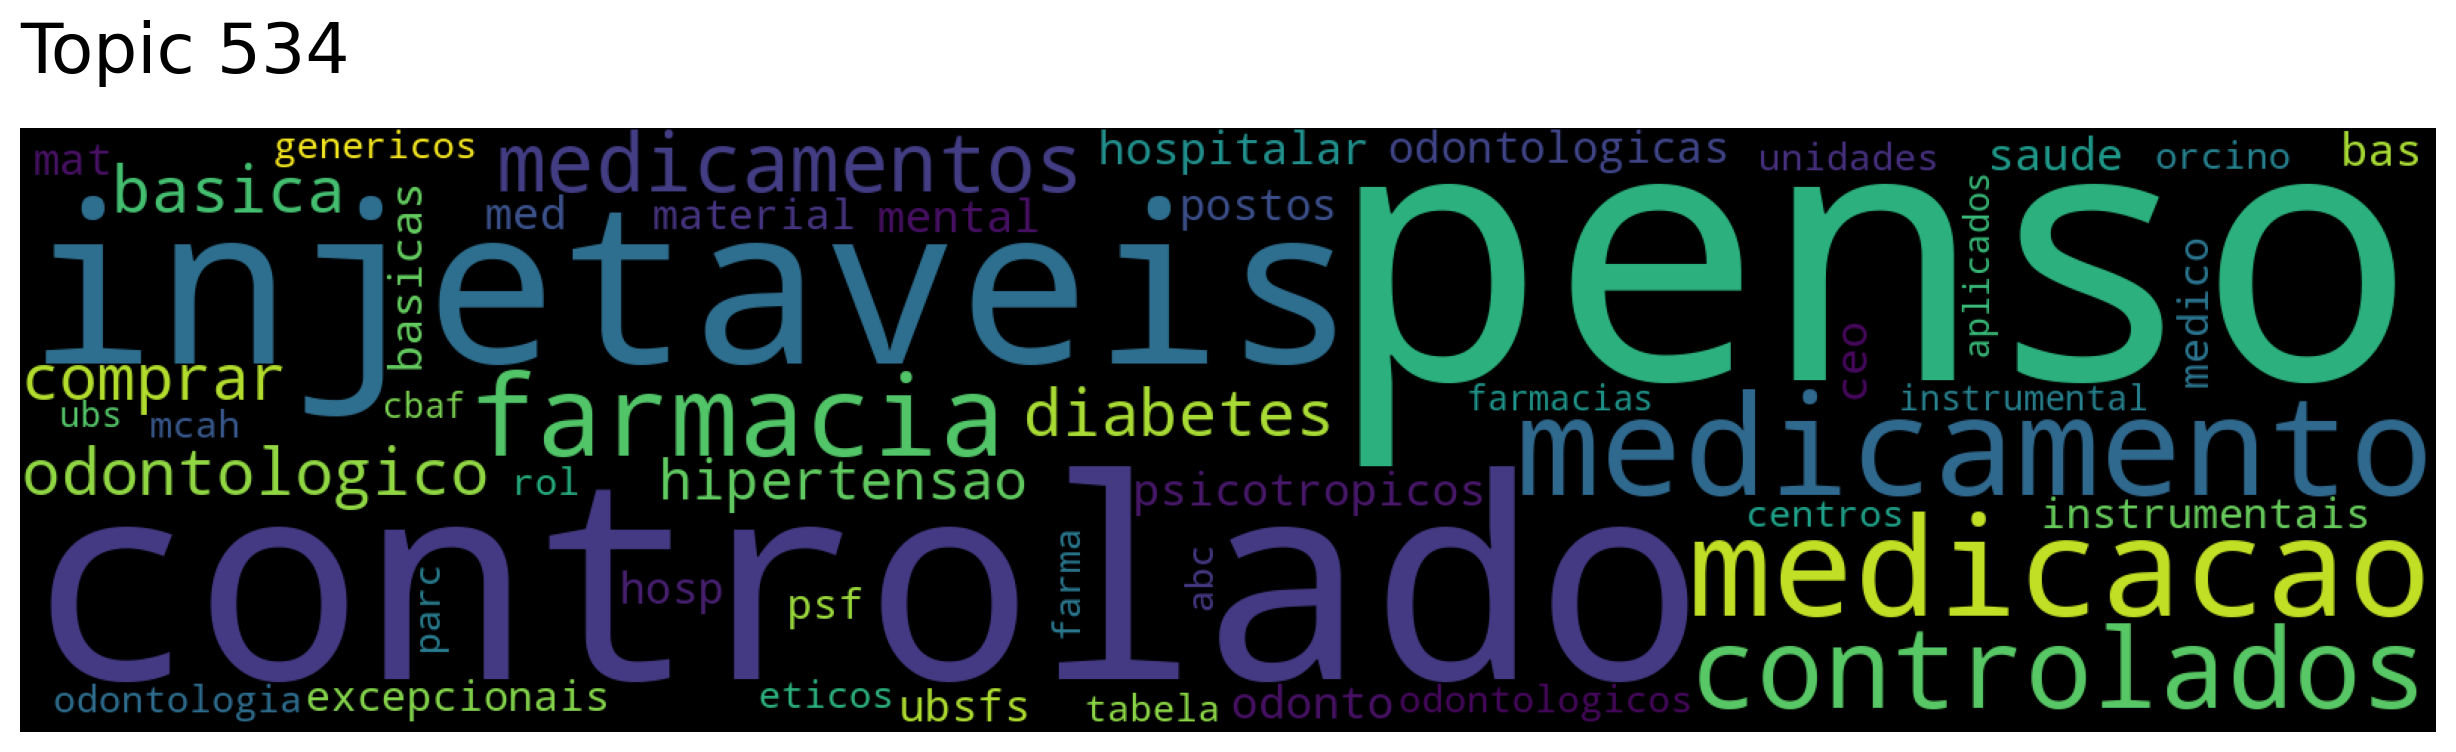

In [52]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicamentos"], num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

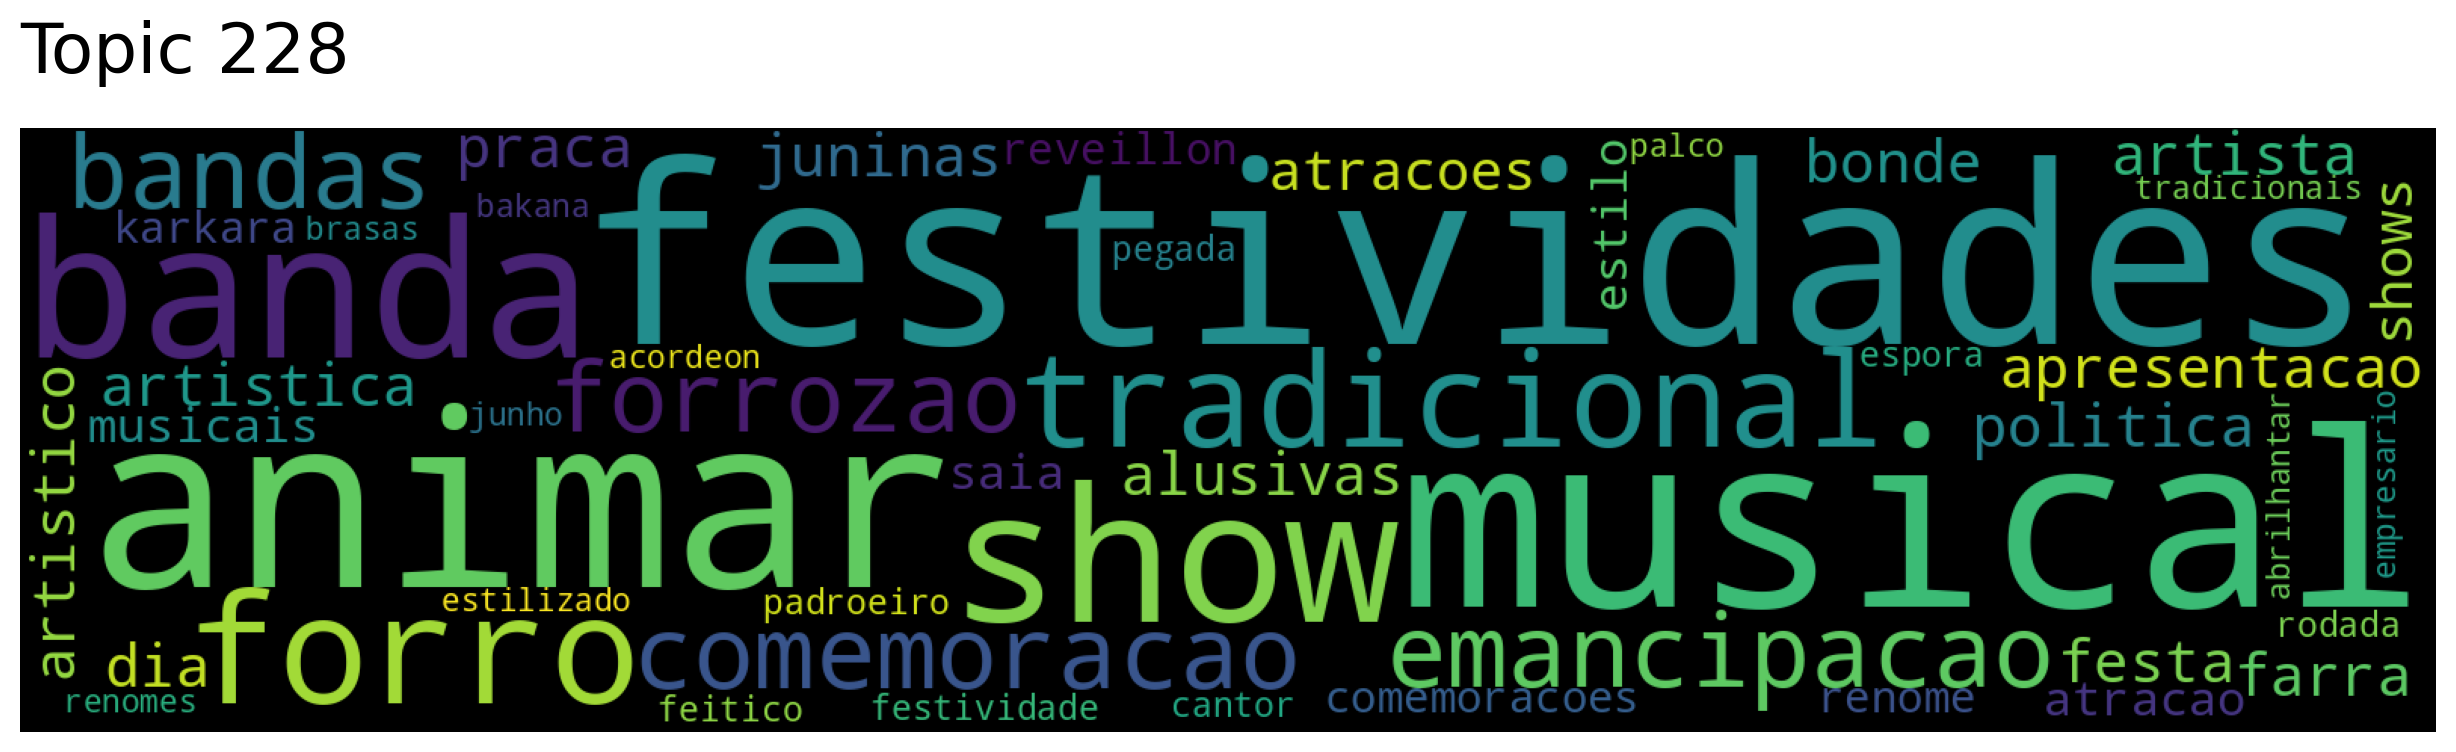

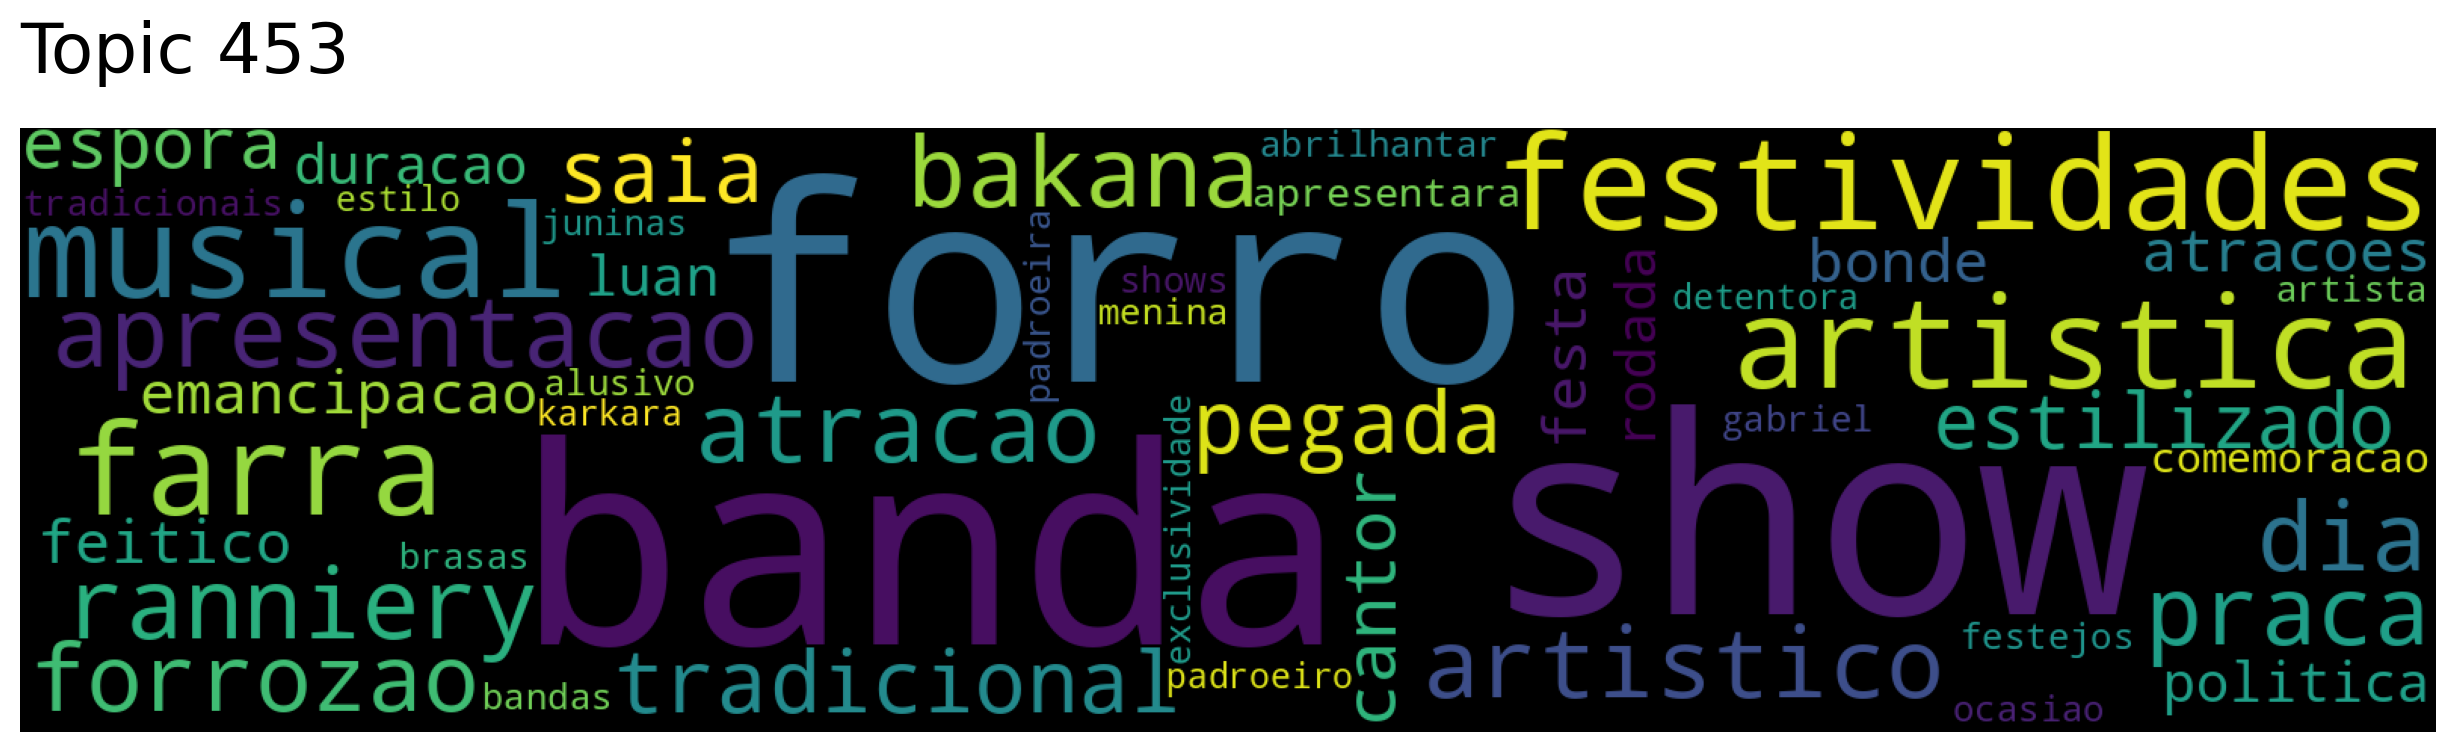

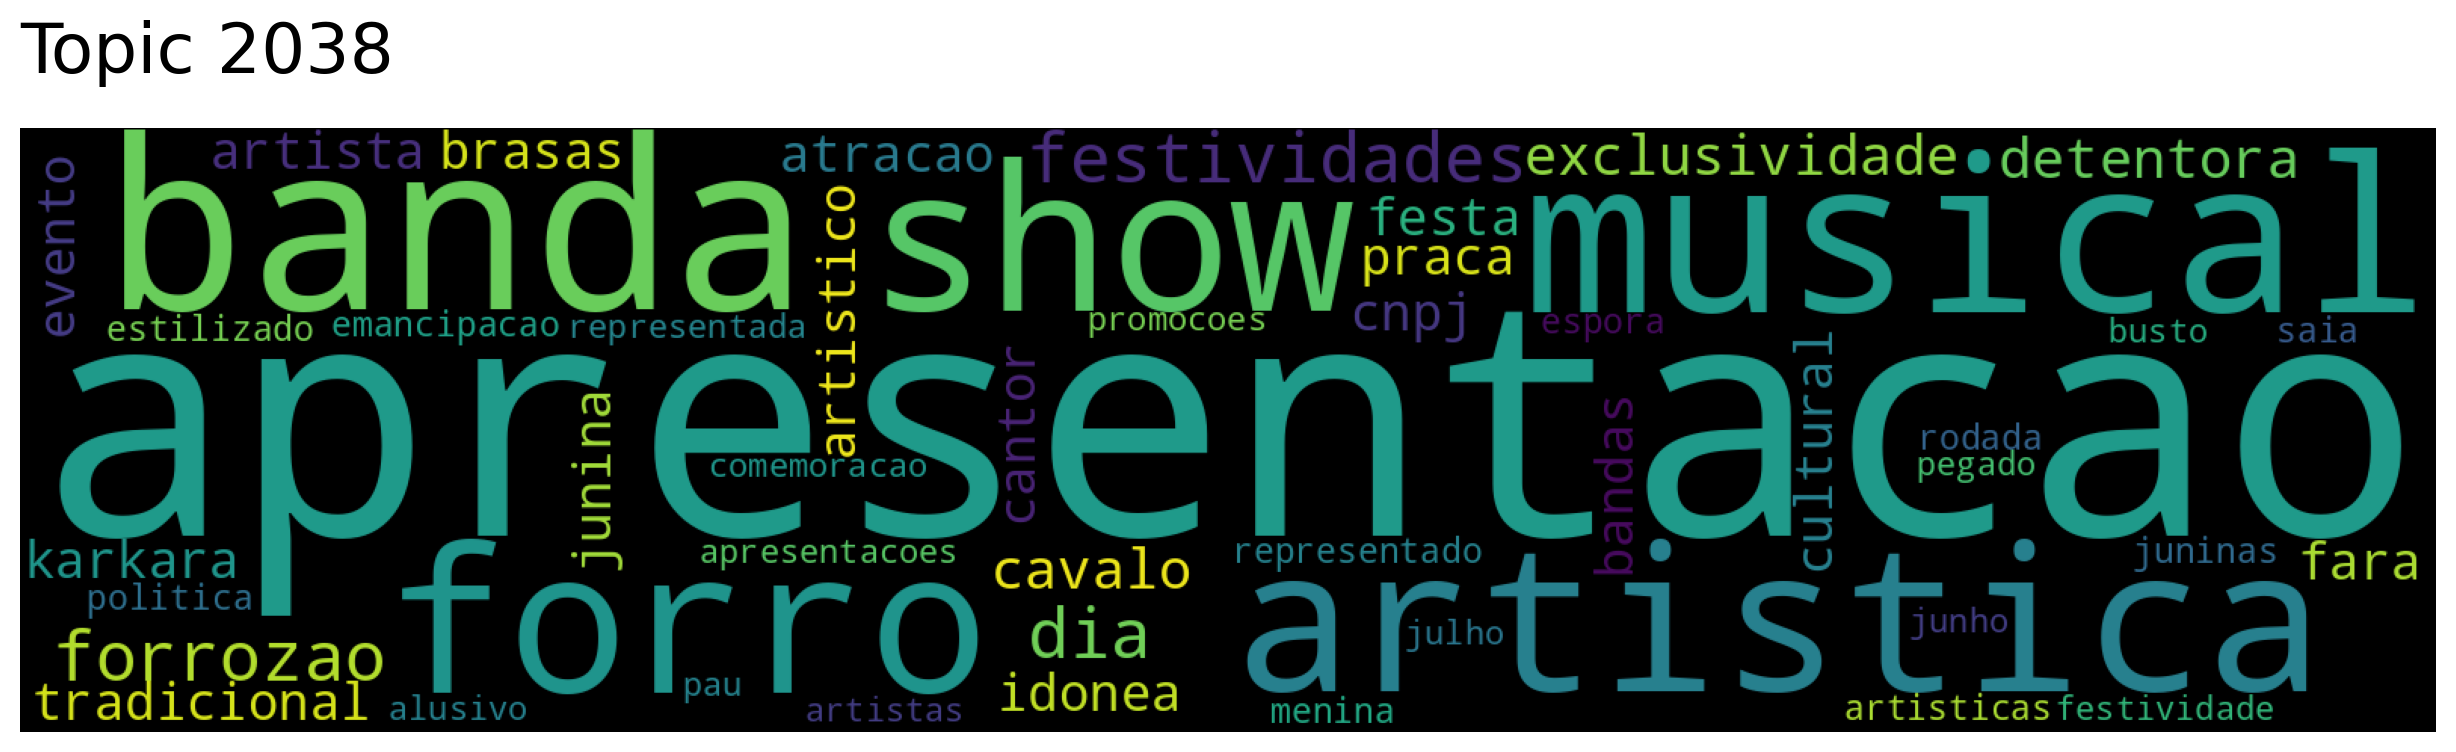

In [53]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["festividades"], num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [57]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=200, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")

Document: 156613, Score: 0.8980554342269897
-----------
contratação de uma empresa na área de construção civil
-----------
Document: 37285, Score: 0.8929917216300964
-----------
contratação de empresa especializada em construção civil.
-----------
Document: 56765, Score: 0.8899407386779785
-----------
contratação de empresa de construção civil para construção de mataburros
-----------
Document: 112058, Score: 0.8875258564949036
-----------
contratacao de empresa do ramo da construcao civil destinada a execucao dos servicos de construcao de 01 (uma) unidade b
-----------
Document: 146749, Score: 0.8832109570503235
-----------
contratação de serviços de bombeiro civil
-----------


------

For large data sets and data sets with very unique vocabulary doc2vec could produce better results. This will train a doc2vec model from scratch. This method is language agnostic. However multiple languages will not be aligned.

Using the universal sentence encoder options will be much faster since those are pre-trained and efficient models. The universal sentence encoder options are suggested for smaller data sets. They are also good options for large data sets that are in English or in languages covered by the multilingual model. It is also suggested for data sets that are multilingual.

The distiluse-base-multilingual-cased pre-trained sentence transformer is suggested for multilingual datasets and languages that are not covered by the multilingual universal sentence encoder. The transformer is significantly slower than the universal sentence encoder options.

More information on universal-sentence-encoder, universal-sentence-encoder-multilingual, and distiluse-base-multilingual-cased.

16 languages (Arabic, Chinese-simplified, Chinese-traditional, English, French, German, Italian, Japanese, Korean, Dutch, Polish, Portuguese, Spanish, Thai, Turkish, Russian) text encoder.

model = Top2Vec(documents, embedding_model='universal-sentence-encoder')